## Python Example Using Agglomerative Hierarchical Clustering ##
This example demonstrates how to perform agglomerative hierarchical clustering using Scikit-learn and how to visualize the clustering hierarchy with a dendrogram using Scipy:

/Users/isac/PycharmProjects/CST-425/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


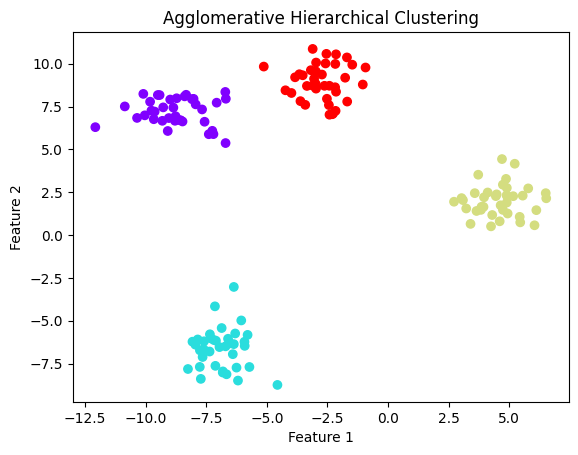

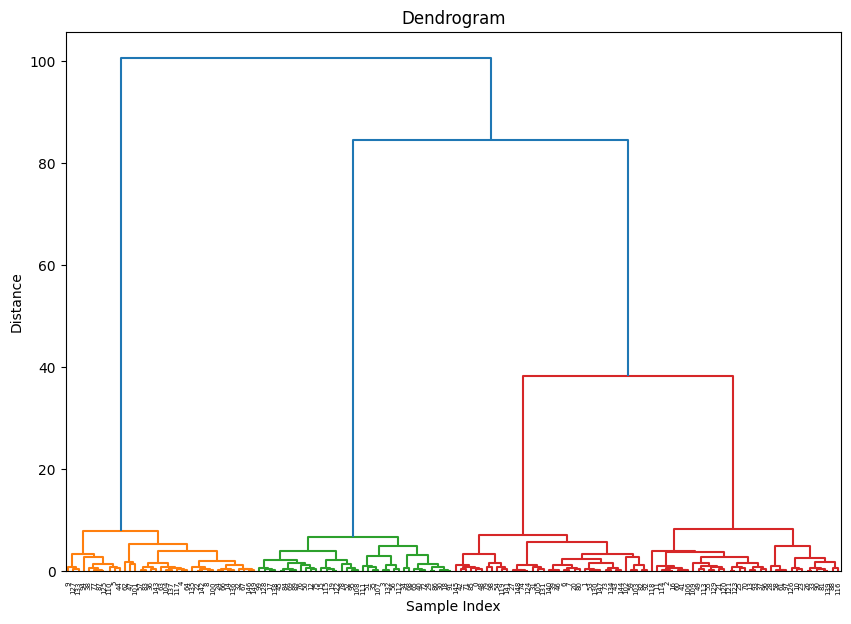

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic two-dimensional data
X, _ = make_blobs(n_samples=150, centers=4, cluster_std=1.0, random_state=42)

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering.fit(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='rainbow')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Generate the linkage matrix for dendrogram
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## How to Interpret the Dendrogram ##
The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The height of the top of the U-link represents the distance between the two clusters that were merged.

This Python example generates synthetic data, applies agglomerative hierarchical clustering, and then plots both the clusters and the dendrogram. This approach provides both a visual representation of the data clusters and an insight into the hierarchical clustering structure.







## Dendograms in detail ##

A **dendrogram** is a tree-like diagram that displays the arrangements of the clusters produced by hierarchical clustering. The main components of a dendrogram are:

**Branches**: Represent clusters that are divided into smaller clusters.
**Leaves**: Represent the final clusters at the bottom of the diagram.
**Root**: Represents the single cluster that gathers all samples, located at the top of the diagram.
**Height of Splits**: Indicates the distance or dissimilarity between clusters being merged. The greater the height, the less similar the clusters are.

### Interpreting a Dendrogram ###
**Vertical Lines**: Vertical lines represent clusters that are being merged or split. The length of the vertical lines represents the distance or dissimilarity between clusters. Longer lines suggest greater dissimilarity.

**Horizontal Lines**: Horizontal lines connect two vertical lines and represent the merging of clusters. The height of the horizontal line indicates the distance at which the two clusters are merged.

**Color Coding**: In many dendrograms, color coding is used to indicate different clusters. A change in color often signifies the formation of a new cluster.

### Visualizing a Dendrogram ###
To help clarify, let's create a more detailed visualization of a dendrogram using Python. This example will include annotations for understanding the components of the dendrogram.

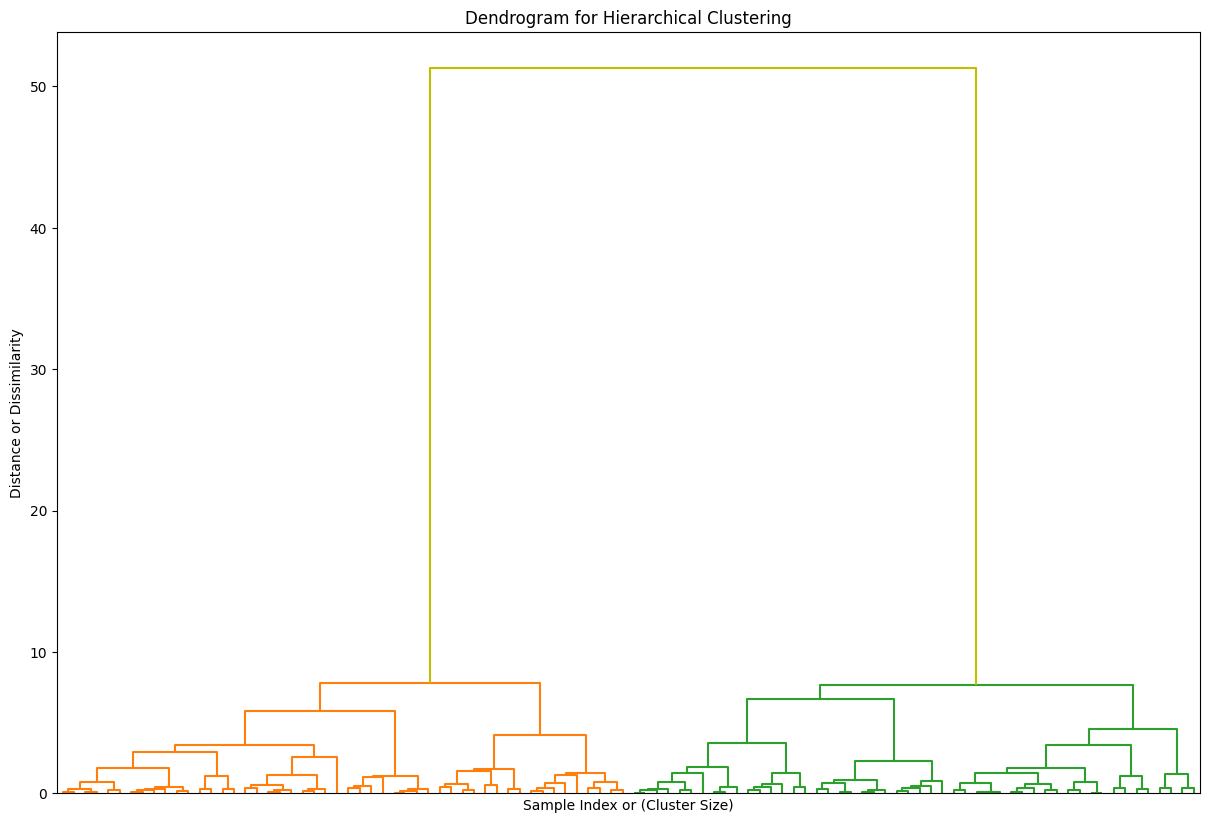

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

# Generating a simple dataset
np.random.seed(42)
X = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=50)
X = np.concatenate([X, np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], size=50)])

# Creating the linkage matrix
Z = linkage(X, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, 
           above_threshold_color='y',
           orientation='top',
           labels=np.arange(100),
           distance_sort='descending',
           show_leaf_counts=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tight_layout()
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance or Dissimilarity")
plt.show()


## How to Use a Dendrogram ##
**Choosing a Cut-off Distance**: By selecting a cut-off distance (drawing a horizontal line on the dendrogram), you can decide the number of clusters. The number of vertical lines this horizontal line crosses is the number of clusters.

**Analyzing Cluster Formation**: By observing the dendrogram, you can understand how closely related various clusters are and analyze the hierarchical structure of cluster formation.

Dendrograms provide a wealth of information about the data structure and the hierarchical clustering process, making them invaluable for visual analysis and decision-making in clustering tasks.

## Prepare new dendogram data ##

In [3]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Generate sample data
np.random.seed(42)
X = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=50)
X = np.concatenate([X, np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], size=50)])

# Compute the linkage matrix
Z = linkage(X, 'ward')

## Create an Interactive Dendrogram Visualization ##

In [4]:
def plot_dendrogram(cut_off_distance=25):
    fig, ax = plt.subplots(figsize=(12, 8))
    dendrogram(Z, ax=ax, color_threshold=cut_off_distance)
    
    # Draw a horizontal line for the cut-off distance
    plt.axhline(y=cut_off_distance, color='r', linestyle='--')
    
    # Determine the number of clusters based on the cut-off distance
    clusters = fcluster(Z, t=cut_off_distance, criterion='distance')
    cluster_count = np.unique(clusters).size
    
    # Annotate the number of clusters
    plt.text(x=10, y=cut_off_distance, s=f'Clusters: {cluster_count}', bbox=dict(facecolor='white', alpha=0.5))
    
    plt.title("Interactive Dendrogram")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

# Create an interactive widget to adjust the cut-off distance
interactive_plot = interactive(plot_dendrogram, cut_off_distance=(0, max(Z[:, 2]), 1))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=25.0, description='cut_off_distance', max=51.26871251287069, step=1.0)…

### How It Works: ###
**Counting Clusters:** We now use the fcluster function from scipy.cluster.hierarchy with the criterion='distance' parameter. This function directly computes the clusters formed at the specified cut-off distance on the linkage matrix Z. The np.unique(clusters).size expression then determines the unique cluster labels, effectively counting the number of clusters.

**plot_dendrogram Function:** Adjusted to calculate the cluster count accurately using the above method and update the plot annotation accordingly.

### Interactive Widget: ### 
Using ipywidgets.interactive, we create a slider that lets users adjust the cut-off distance dynamically. As the slider is moved, the dendrogram updates to reflect the new number of clusters formed at the current distance.

## Testing the model with specific values ##
Testing a hierarchical clustering model with a specific value, such as a cut-off distance or a predetermined number of clusters, involves using the model to assign cluster labels to your data based on the specified criteria. After you have your hierarchical clustering model (i.e., after computing the linkage matrix Z), you can use the fcluster function from scipy.cluster.hierarchy to form clusters.

Here are the steps to test your model with a specific cut-off distance or a specific number of clusters:

## Using a Cut-off Distance ##

If you want to test the model with a specific cut-off distance (i.e., the dendrogram distance at which clusters are defined), you can do so by specifying this distance in the fcluster function. This method will treat the cut-off distance as a threshold for merging clusters.

In [9]:
from scipy.cluster.hierarchy import fcluster

# Assume Z is your linkage matrix from hierarchical clustering
cut_off_distance = 5  # Example cut-off distance; try different values

# Form clusters based on the specified cut-off distance
clusters = fcluster(Z, t=cut_off_distance, criterion='distance')

# `clusters` now contains the cluster labels for each data point based on the specified cut-off distance


## Testing the Model ##
To test the model, you can analyze how well the clusters formed match your expectations or known labels (if you have any). This can involve:

**Visualizing the clusters:** Plotting the data points colored by their cluster labels to visually assess the clustering.
**Evaluating cluster quality:** Using internal metrics (e.g., silhouette score) if you don't have true labels, or external metrics (e.g., adjusted Rand index) if you have true labels, to quantify the clustering performance.
**Example: Visualizing Clusters**
Here's how you might visualize the clusters formed at a specific cut-off distance:

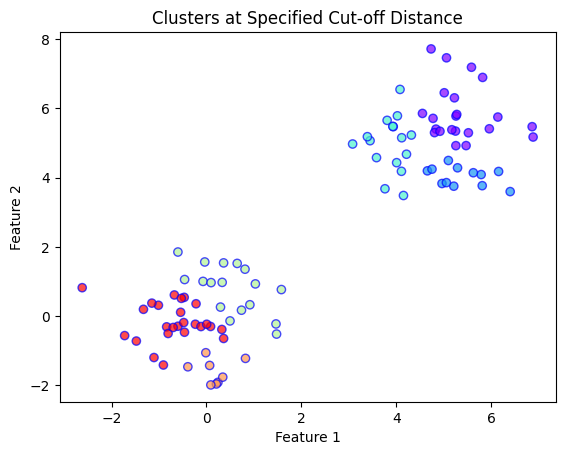

In [10]:
import matplotlib.pyplot as plt

# Assuming X is your dataset
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Clusters at Specified Cut-off Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
